In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
wcd = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\Data Science Projects\World_cup_data\WorldCupMatches.csv")

In [4]:
wcd.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
# Basic statistics on goals and attendance
basic_stats = wcd[['Home Team Goals', 'Away Team Goals', 'Attendance']].describe()
print(basic_stats)


       Home Team Goals  Away Team Goals     Attendance
count       852.000000       852.000000     850.000000
mean          1.811033         1.022300   45164.800000
std           1.610255         1.087573   23485.249247
min           0.000000         0.000000    2000.000000
25%           1.000000         0.000000   30000.000000
50%           2.000000         1.000000   41579.500000
75%           3.000000         2.000000   61374.500000
max          10.000000         7.000000  173850.000000


# Yearly Trend :

        Home Team Goals  Away Team Goals  Total Goals
Year                                                 
1930.0         3.277778         0.611111     3.888889
1934.0         2.823529         1.294118     4.117647
1938.0         3.388889         1.277778     4.666667
1950.0         3.136364         0.863636     4.000000
1954.0         4.192308         1.192308     5.384615
1958.0         2.514286         1.085714     3.600000
1962.0         2.156250         0.625000     2.781250
1966.0         2.156250         0.625000     2.781250
1970.0         2.250000         0.718750     2.968750
1974.0         1.342105         1.210526     2.552632
1978.0         2.078947         0.605263     2.684211
1982.0         1.865385         0.942308     2.807692
1986.0         1.423077         1.115385     2.538462
1990.0         1.288462         0.923077     2.211538
1994.0         1.596154         1.115385     2.711538
1998.0         1.531250         1.140625     2.671875
2002.0         1.390625     

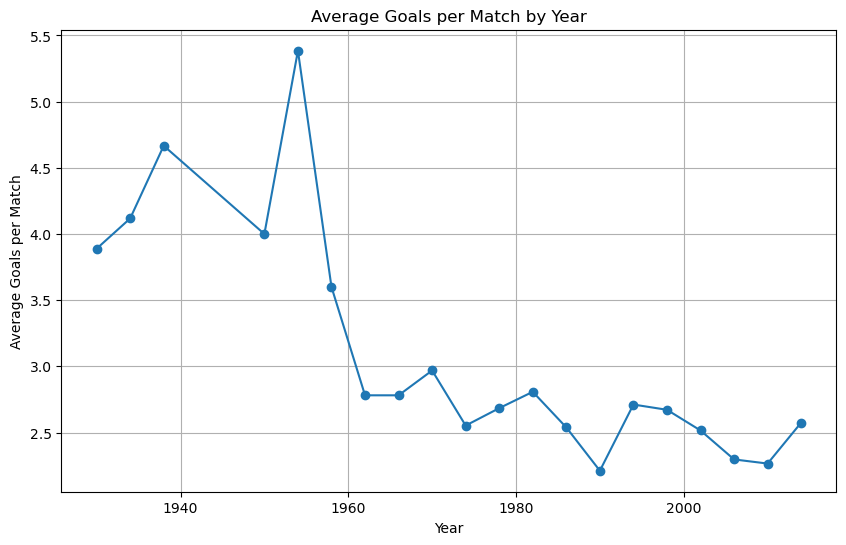

In [7]:
# Average goals per match by year
yearly_goals = wcd.groupby('Year')[['Home Team Goals', 'Away Team Goals']].mean()
yearly_goals['Total Goals'] = yearly_goals['Home Team Goals'] + yearly_goals['Away Team Goals']
print(yearly_goals)

# Plot the trend of total goals over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_goals.index, yearly_goals['Total Goals'], marker='o')
plt.title('Average Goals per Match by Year')
plt.xlabel('Year')
plt.ylabel('Average Goals per Match')
plt.grid(True)
plt.show()


# Team Performance Analysis:

In [8]:
# Aggregate performance of teams: wins, losses, and goals
team_performance = wcd.groupby('Home Team Name')[['Home Team Goals', 'Away Team Goals']].sum()
team_performance.columns = ['Goals Scored', 'Goals Conceded']
print(team_performance)

# Top 10 teams by goals scored
top_teams = team_performance.sort_values('Goals Scored', ascending=False).head(10)
print(top_teams)


                            Goals Scored  Goals Conceded
Home Team Name                                          
Algeria                              5.0            10.0
Angola                               0.0             1.0
Argentina                          111.0            44.0
Australia                            7.0            11.0
Austria                             31.0            17.0
...                                  ...             ...
rn">Bosnia and Herzegovina           3.0             1.0
rn">Republic of Ireland              2.0             2.0
rn">Serbia and Montenegro            0.0             1.0
rn">Trinidad and Tobago              0.0             0.0
rn">United Arab Emirates             0.0             2.0

[78 rows x 2 columns]
                Goals Scored  Goals Conceded
Home Team Name                              
Brazil                 180.0            78.0
Argentina              111.0            44.0
Germany FR              99.0            36.0
Italy      

# Stage wise analysis:

                          Home Team Goals  Away Team Goals  Total Goals
Stage                                                                  
Final                            2.150000         1.300000     3.450000
First round                      3.333333         1.555556     4.888889
Group 1                          2.080645         0.725806     2.806452
Group 2                          2.406780         0.762712     3.169492
Group 3                          2.071429         0.678571     2.750000
Group 4                          2.309091         0.890909     3.200000
Group 5                          0.833333         0.666667     1.500000
Group 6                          3.583333         1.166667     4.750000
Group A                          1.283333         1.383333     2.666667
Group B                          1.666667         1.150000     2.816667
Group C                          1.604167         1.020833     2.625000
Group D                          1.520833         1.041667     2

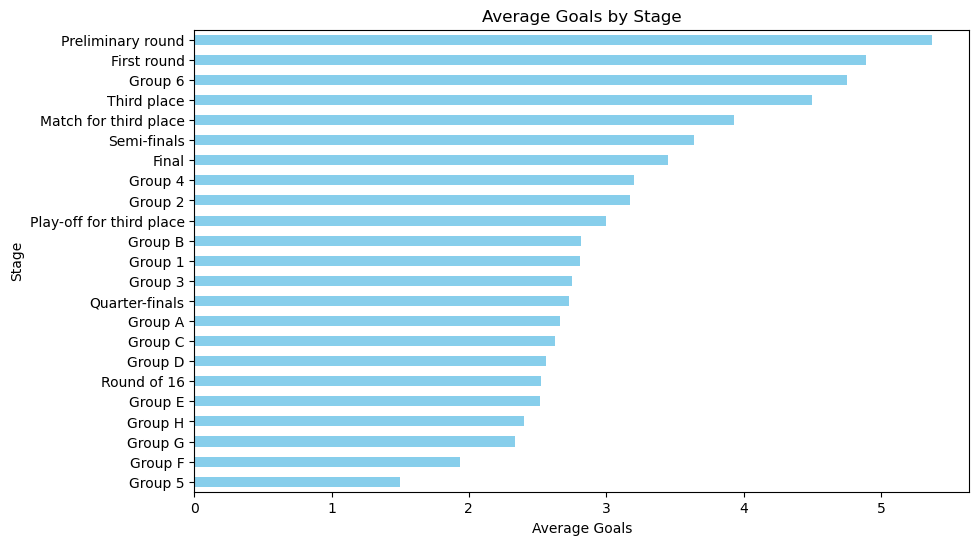

In [9]:
# Average goals by stage
stage_goals = wcd.groupby('Stage')[['Home Team Goals', 'Away Team Goals']].mean()
stage_goals['Total Goals'] = stage_goals['Home Team Goals'] + stage_goals['Away Team Goals']
print(stage_goals)

# Plotting goals by stage
stage_goals.sort_values('Total Goals', inplace=True)
plt.figure(figsize=(10, 6))
stage_goals['Total Goals'].plot(kind='barh', color='skyblue')
plt.title('Average Goals by Stage')
plt.xlabel('Average Goals')
plt.ylabel('Stage')
plt.show()


City
Mexico City        23
Montevideo         18
Rio De Janeiro     18
Guadalajara        17
Johannesburg       15
Sao Paulo          14
Buenos Aires       12
Munich             11
Leon               11
Belo Horizonte     11
Name: count, dtype: int64


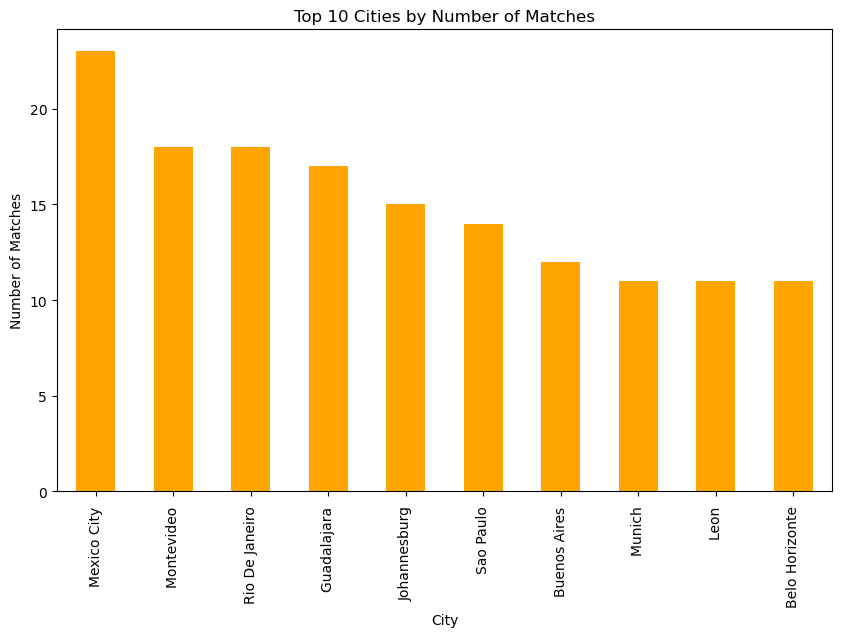

In [10]:
# Number of matches per city
matches_per_city = wcd['City'].value_counts()
print(matches_per_city.head(10))

# Plot the top 10 cities by the number of matches
plt.figure(figsize=(10, 6))
matches_per_city.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Number of Matches')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.show()


                 Home Team Goals  Away Team Goals  Attendance
Home Team Goals         1.000000         0.012474   -0.117751
Away Team Goals         0.012474         1.000000   -0.029801
Attendance             -0.117751        -0.029801    1.000000


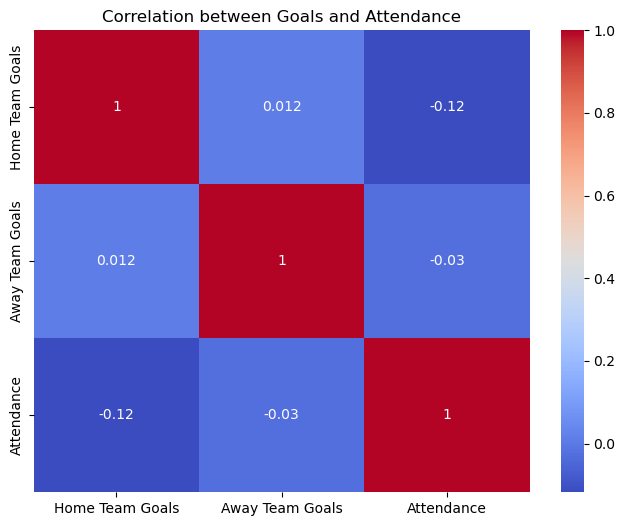

In [15]:
# Correlation between goals and attendance
correlation = wcd[['Home Team Goals', 'Away Team Goals', 'Attendance']].corr()
print(correlation)

# Heatmap of correlations
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Goals and Attendance')
plt.show()


In [18]:
# Matches that ended in a draw (regular time)
draws = wcd[wcd['Home Team Goals'] == wcd['Away Team Goals']]
print(f"Number of draws: {len(draws)}")


Number of draws: 190


Brazil         71.0
Italy          45.0
Argentina      44.0
Germany FR     36.0
Germany        34.0
France         29.0
Netherlands    29.0
Spain          29.0
England        26.0
Uruguay        20.0
dtype: float64


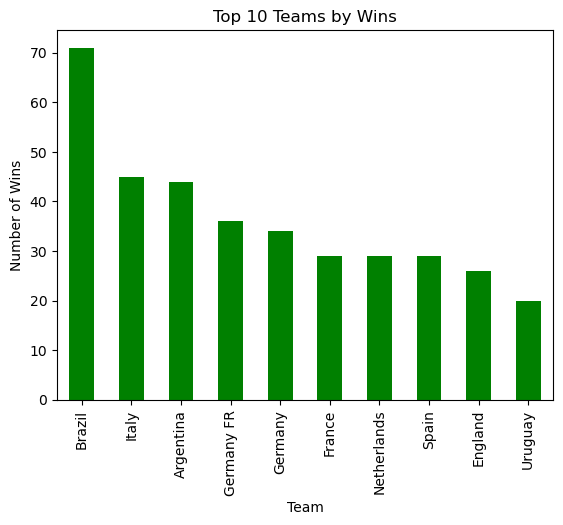

In [20]:
# Calculate wins by Home Team
wcd['Home Win'] = wcd['Home Team Goals'] > wcd['Away Team Goals']
wcd['Away Win'] = wcd['Home Team Goals'] < wcd['Away Team Goals']

home_wins = wcd.groupby('Home Team Name')['Home Win'].sum()
away_wins = wcd.groupby('Away Team Name')['Away Win'].sum()

total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)
print(total_wins.head(10))

# Plotting the top 10 teams with the most wins
total_wins.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Teams by Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()


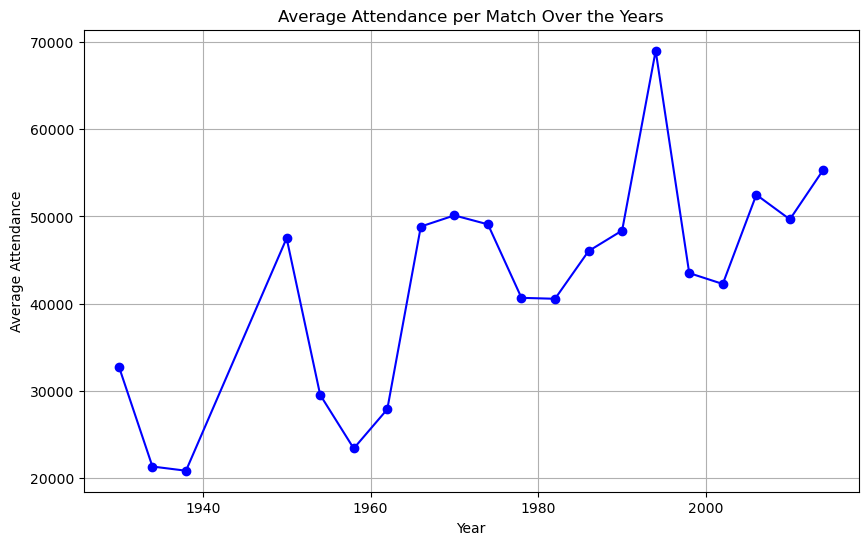

In [21]:
# Calculate average attendance per year
average_attendance = wcd.groupby('Year')['Attendance'].mean()

# Plotting average attendance over the years
plt.figure(figsize=(10, 6))
plt.plot(average_attendance.index, average_attendance, marker='o', linestyle='-', color='blue')
plt.title('Average Attendance per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.grid(True)
plt.show()


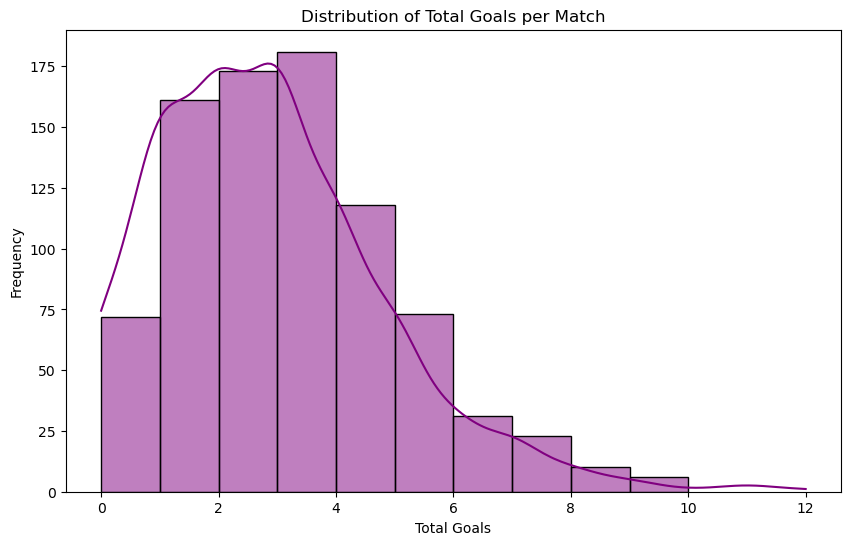

In [22]:
# Distribution of total goals per match
wcd['Total Goals'] = wcd['Home Team Goals'] + wcd['Away Team Goals']

plt.figure(figsize=(10, 6))
sns.histplot(wcd['Total Goals'], bins=range(0, 11), kde=True, color='purple')
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()


Referee
Ravshan IRMATOV (UZB)       10
RODRIGUEZ Marco (MEX)        8
LARRIONDA Jorge (URU)        8
ARCHUNDIA Benito (MEX)       8
QUINIOU Joel (FRA)           8
DE BLEECKERE Frank (BEL)     7
LANGENUS Jean (BEL)          7
WEBB Howard (ENG)            7
SIMON Carlos (BRA)           7
GARDEAZABAL Juan (ESP)       7
Name: count, dtype: int64


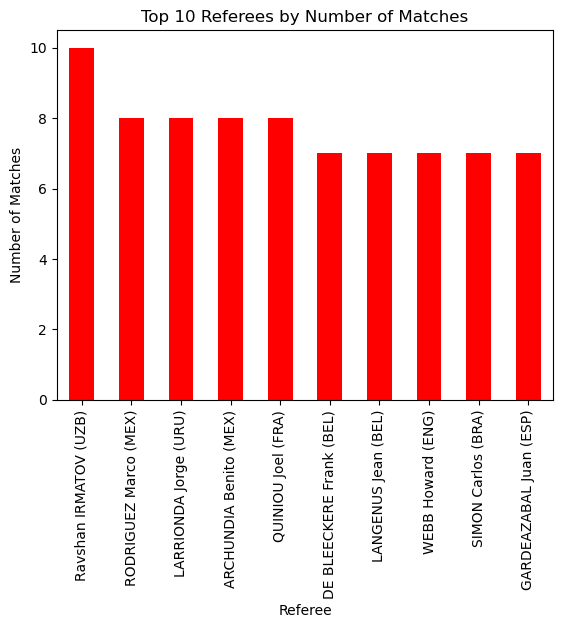

In [23]:
# Number of matches refereed by each referee
matches_by_referee = wcd['Referee'].value_counts()
print(matches_by_referee.head(10))

# Plot the top 10 referees by number of matches
matches_by_referee.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Referees by Number of Matches')
plt.xlabel('Referee')
plt.ylabel('Number of Matches')
plt.show()


Average Home Team Goals: 1.8110328638497653
Average Away Team Goals: 1.022300469483568


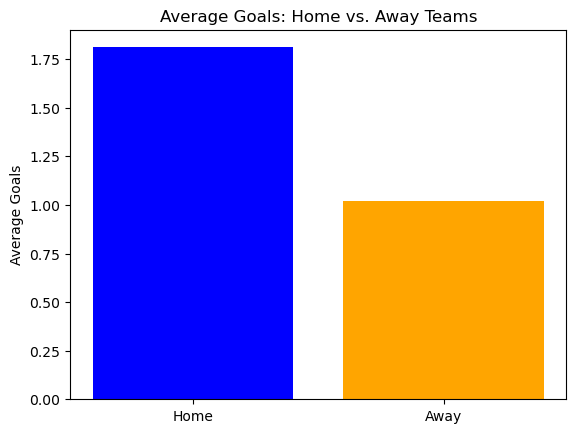

In [24]:
# Calculate average goals scored by home teams vs. away teams
average_goals_home = wcd['Home Team Goals'].mean()
average_goals_away = wcd['Away Team Goals'].mean()

print(f'Average Home Team Goals: {average_goals_home}')
print(f'Average Away Team Goals: {average_goals_away}')

# Plot comparison
plt.bar(['Home', 'Away'], [average_goals_home, average_goals_away], color=['blue', 'orange'])
plt.title('Average Goals: Home vs. Away Teams')
plt.ylabel('Average Goals')
plt.show()


C:\Users\Shobhan Sarkar\AppData\Local\Temp\ipykernel_11948\2529338727.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stage_wins = wcd.groupby('Stage').apply(lambda x: (x['Home Win'].sum() + x['Away Win'].sum()) / len(x))


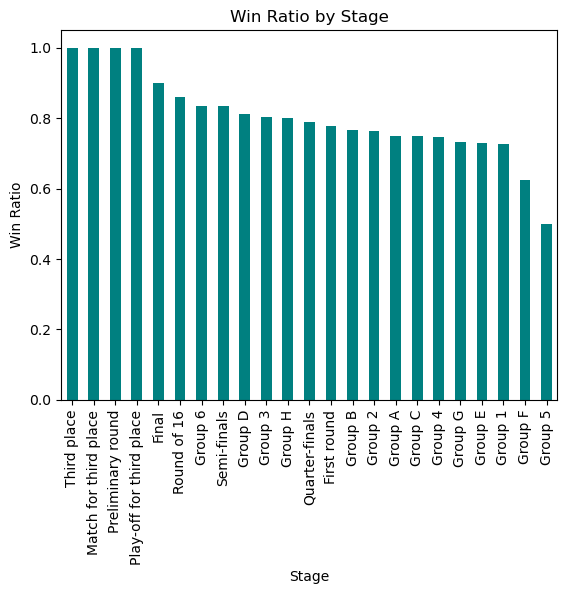

In [25]:
# Number of wins by stage
stage_wins = wcd.groupby('Stage').apply(lambda x: (x['Home Win'].sum() + x['Away Win'].sum()) / len(x))

# Plotting the win ratio by stage
stage_wins.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Win Ratio by Stage')
plt.xlabel('Stage')
plt.ylabel('Win Ratio')
plt.show()


Number of matches that went into extra time or penalties: 4572


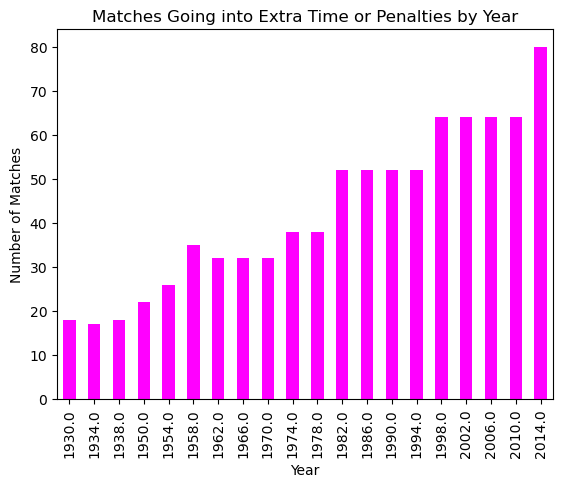

In [26]:
# Identify matches that went into extra time or penalty shootouts
extra_time_matches = wcd[wcd['Win conditions'] != '']

print(f"Number of matches that went into extra time or penalties: {len(extra_time_matches)}")

# Breakdown by year
extra_time_by_year = extra_time_matches.groupby('Year').size()

# Plotting extra time matches by year
extra_time_by_year.plot(kind='bar', color='magenta')
plt.title('Matches Going into Extra Time or Penalties by Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()


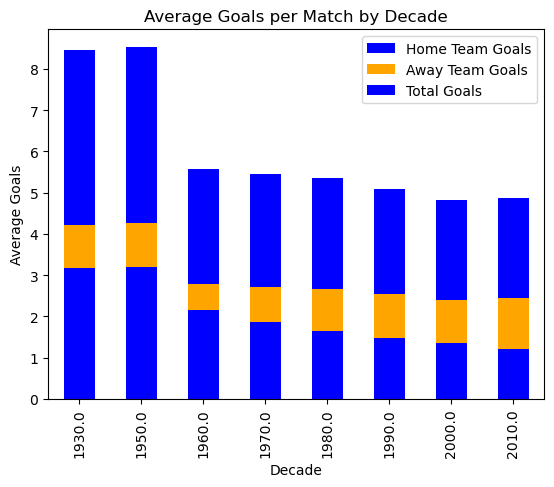

In [27]:
wcd['Decade'] = (wcd['Year'] // 10) * 10
goals_by_decade = wcd.groupby('Decade')[['Home Team Goals', 'Away Team Goals']].mean()
goals_by_decade['Total Goals'] = goals_by_decade['Home Team Goals'] + goals_by_decade['Away Team Goals']

goals_by_decade.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Average Goals per Match by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Goals')
plt.show()


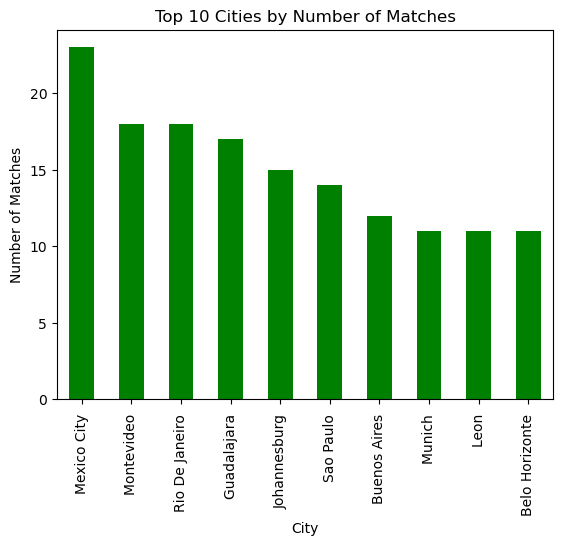

In [29]:
# Number of matches by city
matches_by_city = wcd['City'].value_counts()

# Plotting the top 10 cities by number of matches
matches_by_city.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Cities by Number of Matches')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.show()



C:\Users\Shobhan Sarkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


         Home Team Goals  Away Team Goals  Total Goals
Cluster                                               
0               8.169231         6.876923    15.046154
1              69.333333        28.833333    98.166667
2             180.000000        78.000000   258.000000


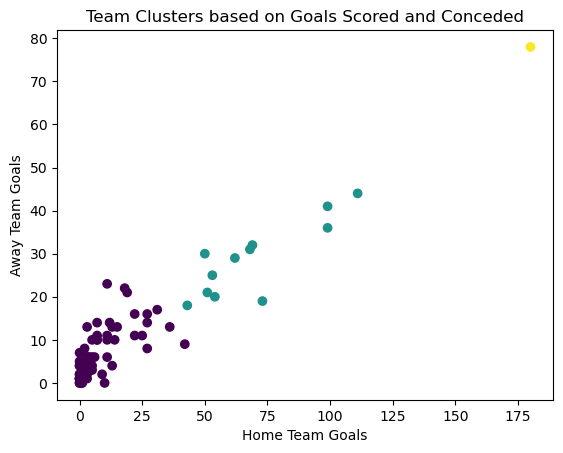

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

performance_data = wcd.groupby('Home Team Name')[['Home Team Goals', 'Away Team Goals']].sum()
performance_data['Total Goals'] = performance_data['Home Team Goals'] + performance_data['Away Team Goals']

scaler = StandardScaler()
performance_scaled = scaler.fit_transform(performance_data)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(performance_scaled)

performance_data['Cluster'] = clusters
print(performance_data.groupby('Cluster').mean())

# Visualize the clusters
plt.scatter(performance_data['Home Team Goals'], performance_data['Away Team Goals'], c=performance_data['Cluster'], cmap='viridis')
plt.title('Team Clusters based on Goals Scored and Conceded')
plt.xlabel('Home Team Goals')
plt.ylabel('Away Team Goals')
plt.show()


In [32]:
wcd['Goal Difference'] = wcd['Home Team Goals'] - wcd['Away Team Goals']
wcd['Win Streak'] = wcd.groupby('Home Team Name')['Home Win'].cumsum() - wcd.groupby('Home Team Name')['Home Win'].cumsum().shift().fillna(0)


In [33]:
from sklearn.ensemble import RandomForestClassifier

X = wcd[['Home Team Goals', 'Away Team Goals', 'Goal Difference']]
y = wcd['Match Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       801
           1       1.00      1.00      1.00       114

    accuracy                           1.00       915
   macro avg       1.00      1.00      1.00       915
weighted avg       1.00      1.00      1.00       915



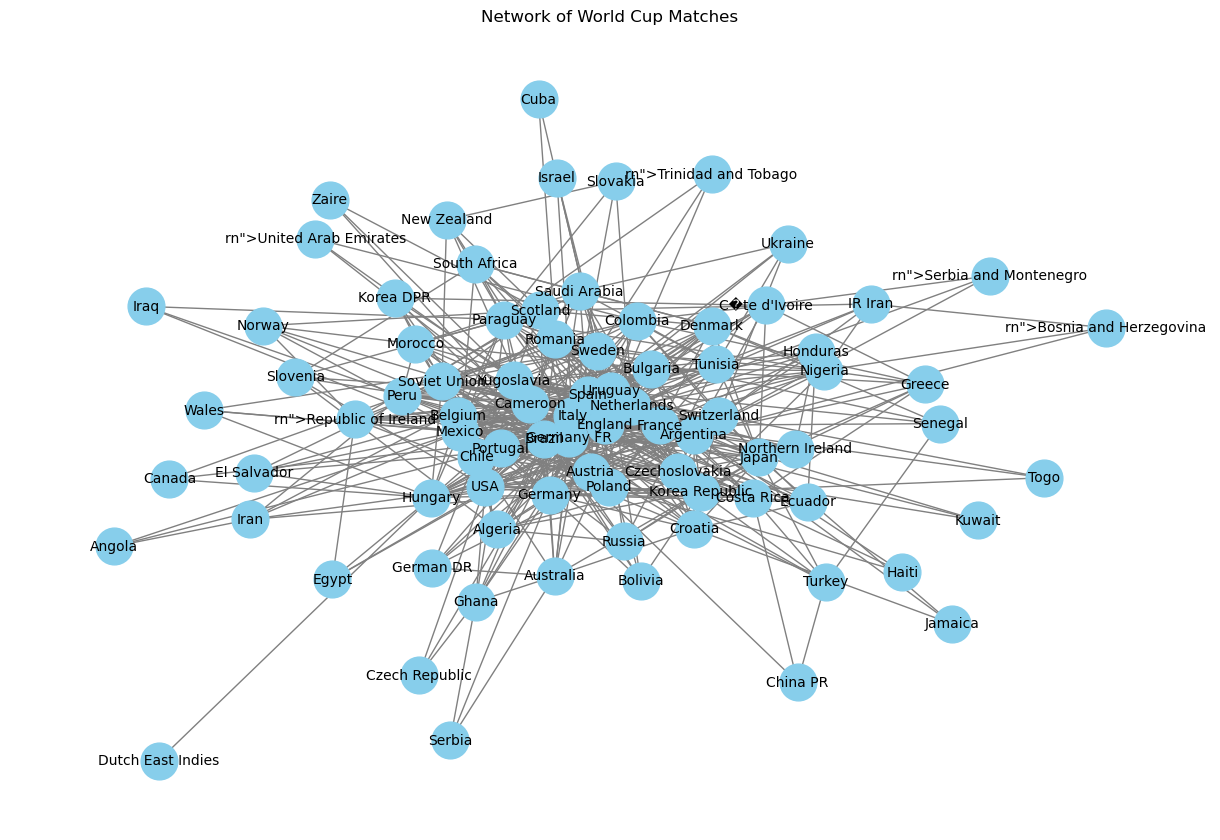

In [38]:
import networkx as nx

match_edges = wcd[['Home Team Name', 'Away Team Name']].value_counts().reset_index()
match_edges.columns = ['Home Team', 'Away Team', 'Matches']

G = nx.from_pandas_edgelist(match_edges, 'Home Team', 'Away Team', edge_attr='Matches')

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_size=10, edge_color='grey')
plt.title('Network of World Cup Matches')
plt.show()


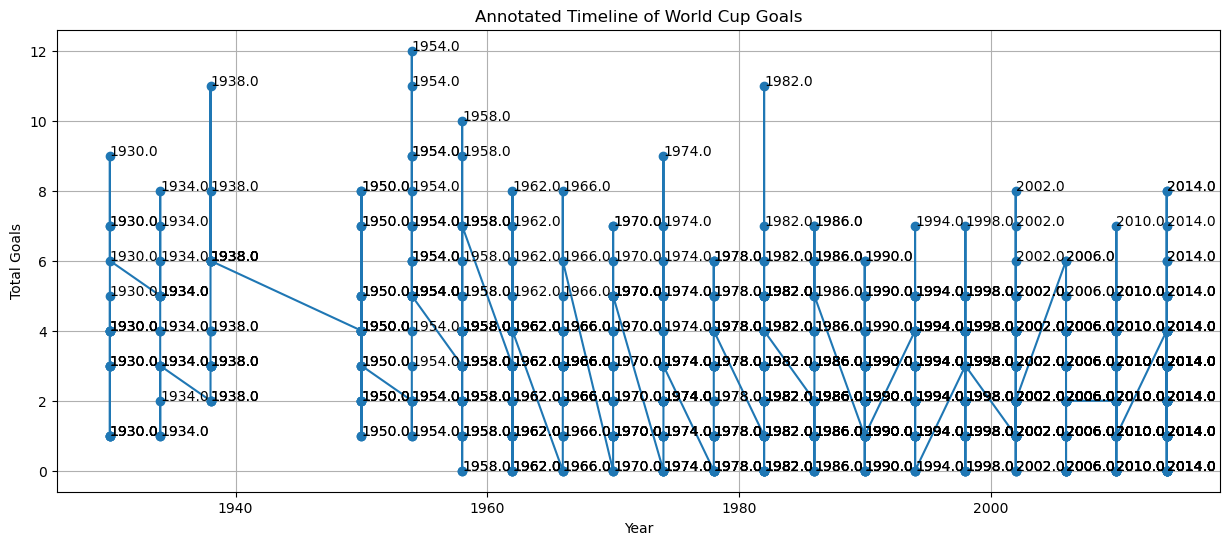

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(wcd['Year'], wcd['Total Goals'], marker='o')

for i, txt in enumerate(wcd['Year']):
    ax.annotate(txt, (wcd['Year'][i], wcd['Total Goals'][i]))

plt.title('Annotated Timeline of World Cup Goals')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)
plt.show()
